<a href="https://colab.research.google.com/github/EduGod0y/astrophysics/blob/main/EBV_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.table import Table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First I´ve uploaded a Table with just three columns, one of them is the EBV (where I get the color) and the RA,DEC of the pixel wich I´m plotting the color.

I build this table following Juan´s Palbo Caso instructions as follow:



1.   I generate the grid of points for whom I wanted to obtained the reddening. I did it in python in the following notebook: https://colab.research.google.com/drive/1QHyY3jPuey8rFYcEhxzZCTJiHylzfRsc?usp=sharing
2.   I attach the output as xy.reg. The next step should be opening the image in ds9 and selecting Load regions from the Regions menu, indicating XY format and Image coordinate system.
3. Then you select Save regions, with XY format, WCS coordinate system, FK5 Degrees.
4.At his point your have your grid of points in celestial coordinates, you should edit the file to add the column names indicated at the web page from IRSA:\
|  ra	   |  dec	| \
|  double  |  double	|
5. Upload it to the web tool (https://irsa.ipac.caltech.edu/applications/DUST/), it will generate a table with lot of columns, wich I saved in an auxiliary file, aux.cat; we just want the columns with the coordinates and the E(B-V) from Schlafly and Finkbeiner 2011 recalibration. The simplest way is to use awk, which is in every linux distribution:
cat aux.cat | awk '{print $1,$2,$4}' > EBV.cat



In [ ]:
data = Table.read('/content/drive/MyDrive/EBV4244.fits')
RA = data['ra']
DEC = data['dec']
c = data['EBV']

In [ ]:
data1 = Table.read('/content/drive/MyDrive/EBV4214.fits')
RA1 = data1['ra']
DEC1 = data1['dec']
c1 = data1['EBV']

In [ ]:
data2 = Table.read('/content/drive/MyDrive/EBV2403.fits')
RA2 = data2['ra']
DEC2 = data2['dec']
c2 = data2['EBV']

In [ ]:
name = '/content/drive/MyDrive/image_r_ngc4244.fz'
image_file = get_pkg_data_filename(name)
hdu = fits.open(image_file)[1]
wcs = WCS(hdu.header)

Then I uploaded an image of the field to plot my points as a projection of them.

In [ ]:
name1 = '/content/drive/MyDrive/image_r_ngc4214.fz'
image_file1 = get_pkg_data_filename(name1)
hdu1 = fits.open(image_file1)[1]
wcs1 = WCS(hdu1.header)

In [ ]:
name2 = '/content/drive/MyDrive/image_r_ngc2403.fz'
image_file2 = get_pkg_data_filename(name2)
hdu2 = fits.open(image_file2)[1]
wcs2 = WCS(hdu2.header)

And then I finally plot everything together.

<ipython-input-5-2d07aa35938c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)


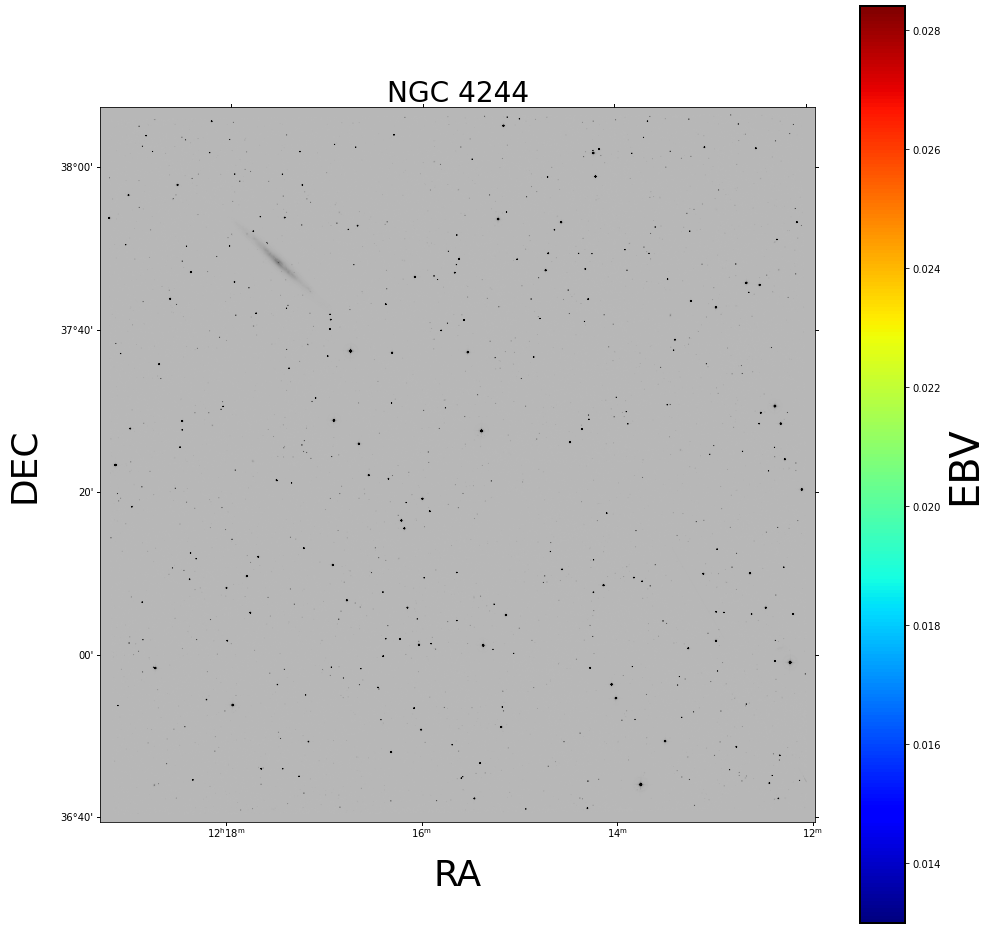

In [ ]:
#@title E(B-V) | NGC4244
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs)
j = ax.scatter(RA, DEC,  marker='.', c=c, cmap=plt.cm.jet, s=300, alpha=1,lw=3, facecolors='none', transform=ax.get_transform('world'))
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 
# set the color limits
#im.set_clim(0.8, 1.0)
title = 'NGC 4244'
#ax.legend()

plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='EBV',)

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()

#ax.imshow(hdu.data,cmap='gray', vmin=0.00002*np.mean(hdu.data), vmax=1*np.mean(hdu.data))
ax.imshow(hdu.data, cmap='gist_yarg', vmin=-9.4, vmax=24) 
plt.tight_layout()
plt.show()

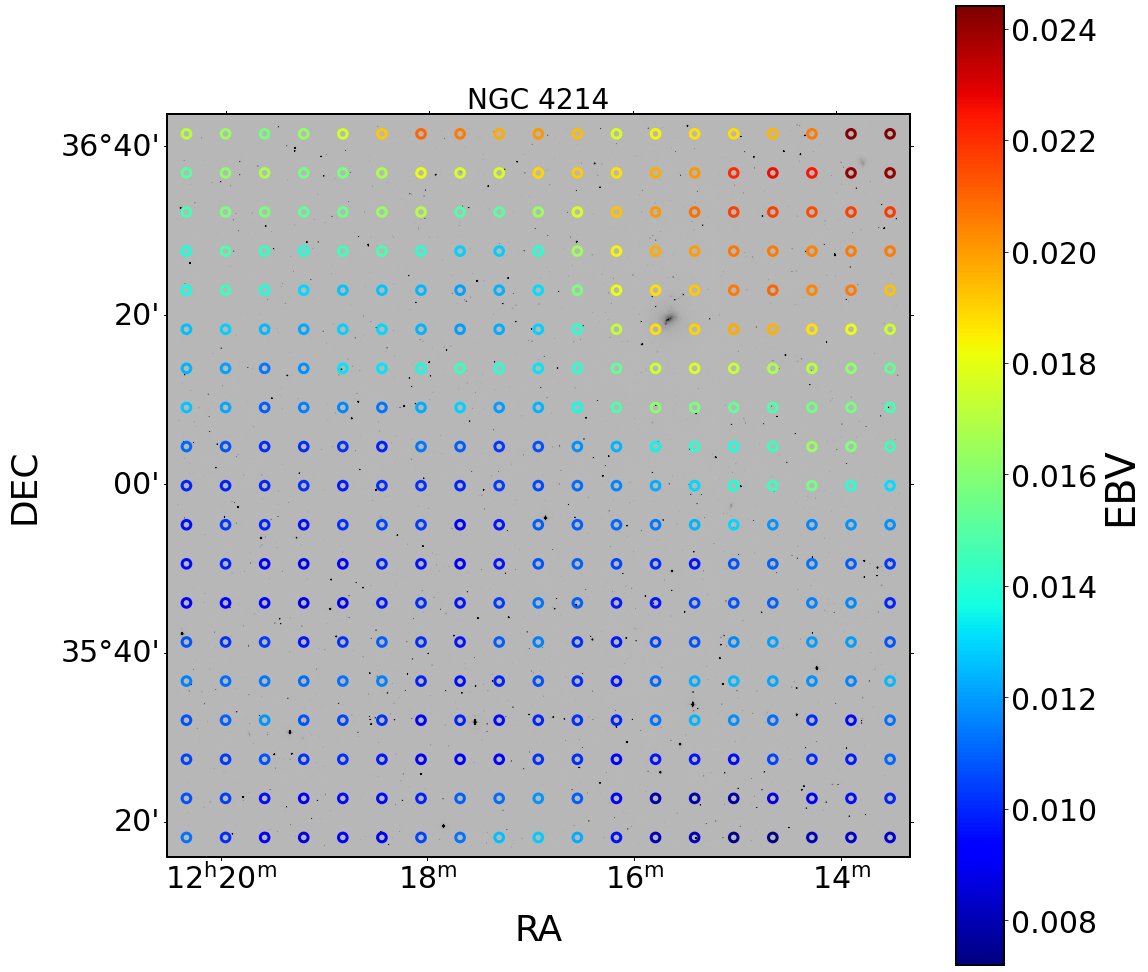

In [ ]:
#@title E(B-V) | NGC 4214
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs1)
j = ax.scatter(RA1, DEC1,  marker='.', c=c1, cmap=plt.cm.jet, s=300, alpha=1,lw=3, facecolors='none', transform=ax.get_transform('world'))
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 
# set the color limits
#im.set_clim(0.8, 1.0)
title = 'NGC 4214'
#ax.legend()
plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='EBV')

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()

ax.imshow(hdu1.data, cmap='gist_yarg', vmin=-9.4, vmax=24) 

plt.show()

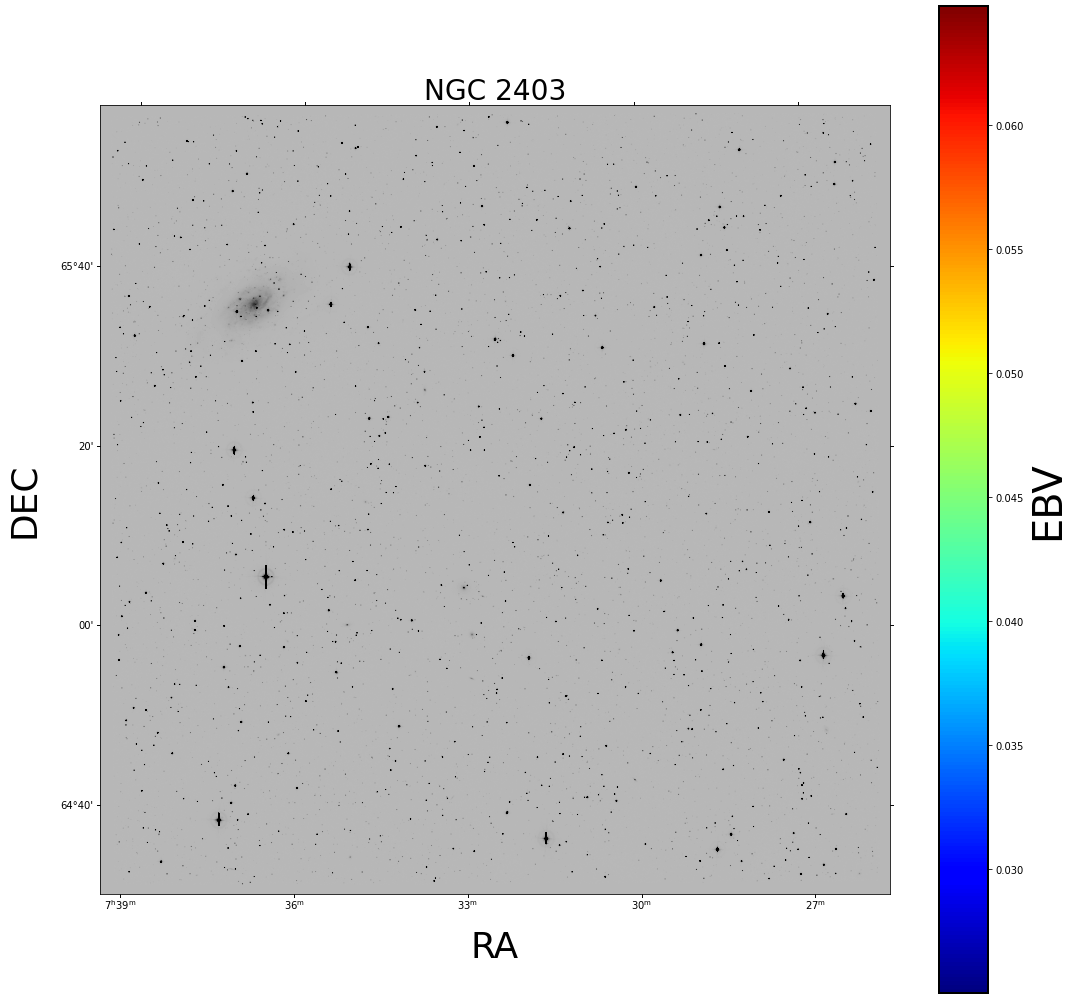

In [ ]:
#@title E(B-V) | NGC2403
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs2)
j = ax.scatter(RA2, DEC2,  marker='.', c=c2, cmap=plt.cm.jet, s=300, alpha=1,lw=3, facecolors='none', transform=ax.get_transform('world'))
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 
# set the color limits
#im.set_clim(0.8, 1.0)
title = 'NGC 2403'
#ax.legend()

plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='EBV',)

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()

#ax.imshow(hdu.data,cmap='gray', vmin=0.00002*np.mean(hdu.data), vmax=1*np.mean(hdu.data))
ax.imshow(hdu2.data, cmap='gist_yarg', vmin=-9.4, vmax=24) 
plt.tight_layout()
plt.show()

To discover the extiction on each filter i´ve applied the equation $A_λ=E(B-V)*kx_λ$

In [ ]:
#@title Calculando a extinção para cada filtro
#@markdown rSDSS

#@markdown gSDSS

#@markdown iSDSS

#@markdown zSDSS

#@markdown uJAVA

#@markdown J0378

#@markdown J0395

#@markdown J0410

#@markdown J0430

#@markdown J0515

#@markdown J0660

#@markdown J0861


r_4244 = 2.3829999*c
g_4244 = 3.398*c
i_4244 = 1.74300003*c
z_4244 = 1.28900003*c
u_4244 = 4.47900009*c
J0378_4244 = 4.29400015*c
J0395_4244 = 4.22599983*c
J0410_4244 = 4.02299976*c
J0430_4244 = 3.85899997*c
J0515_4244 = 3.148*c
J0660_4244 = 2.16100001*c
J0861_4244 = 1.38100004*c
r_4214 = 2.3829999*c1
g_4214 = 3.398*c1
i_4214 = 1.74300003*c1
z_4214 = 1.28900003*c1
u_4214 = 4.47900009*c1
J0378_4214 = 4.29400015*c1
J0395_4214 = 4.22599983*c1
J0410_4214 = 4.02299976*c1
J0430_4214 = 3.85899997*c1
J0515_4214 = 3.148*c1
J0660_4214 = 2.16100001*c1
J0861_4214 = 1.38100004*c1
r_2403 = 2.3829999*c2
g_2403 = 3.398*c2
i_2403 = 1.74300003*c2
z_2403 = 1.28900003*c2
u_2403 = 4.47900009*c2
J0378_2403 = 4.29400015*c2
J0395_2403 = 4.22599983*c2
J0410_2403 = 4.02299976*c2
J0430_2403 = 3.85899997*c2
J0515_2403 = 3.148*c2
J0660_2403 = 2.16100001*c2
J0861_2403 = 1.38100004*c2

Then you just need to put the maximum value of $A_λ$ of the filter that you are trying to analyze on the vmax term. \
You can discover the value by simply running print(max(filter_that_you_want))

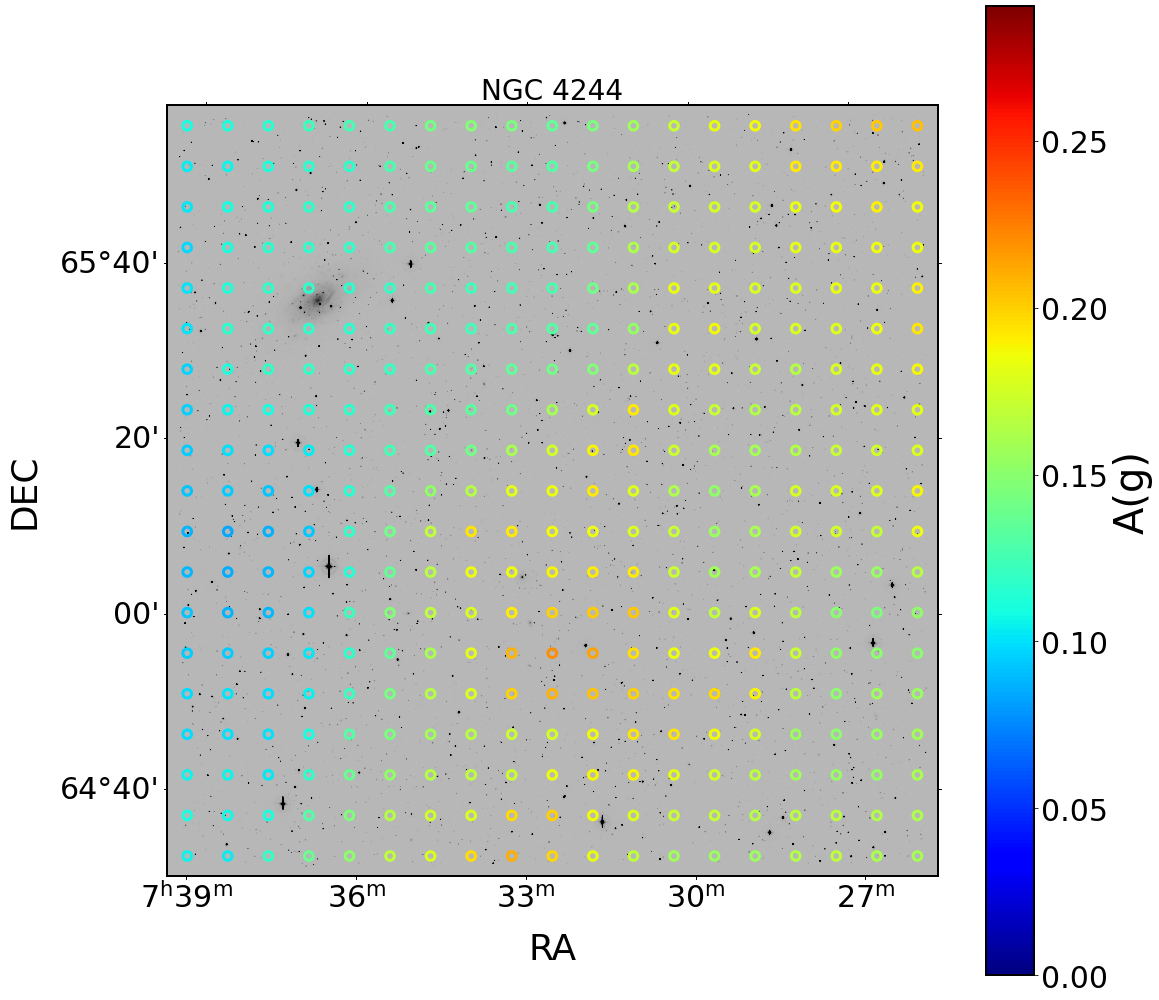

In [ ]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs2) #wcs for NGC4244, wcs1 for NGC4214, wcs2 for NGC2403
j = ax.scatter(RA2, DEC2,  marker='.', c=g_2403, cmap=plt.cm.jet, s=300, alpha=1,lw=3,
               facecolors='none', transform=ax.get_transform('world'),vmax=0.2902392,vmin=0) #filter_galaxy
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 

title = 'NGC 4244'


plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='A(g)')

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()


ax.imshow(hdu2.data, cmap='gist_yarg', vmin=-9.4, vmax=24) #hdu for NGC4244, hdu for NGC4214, hdu for NGC2403

plt.tight_layout()
plt.show()

NameError: ignored

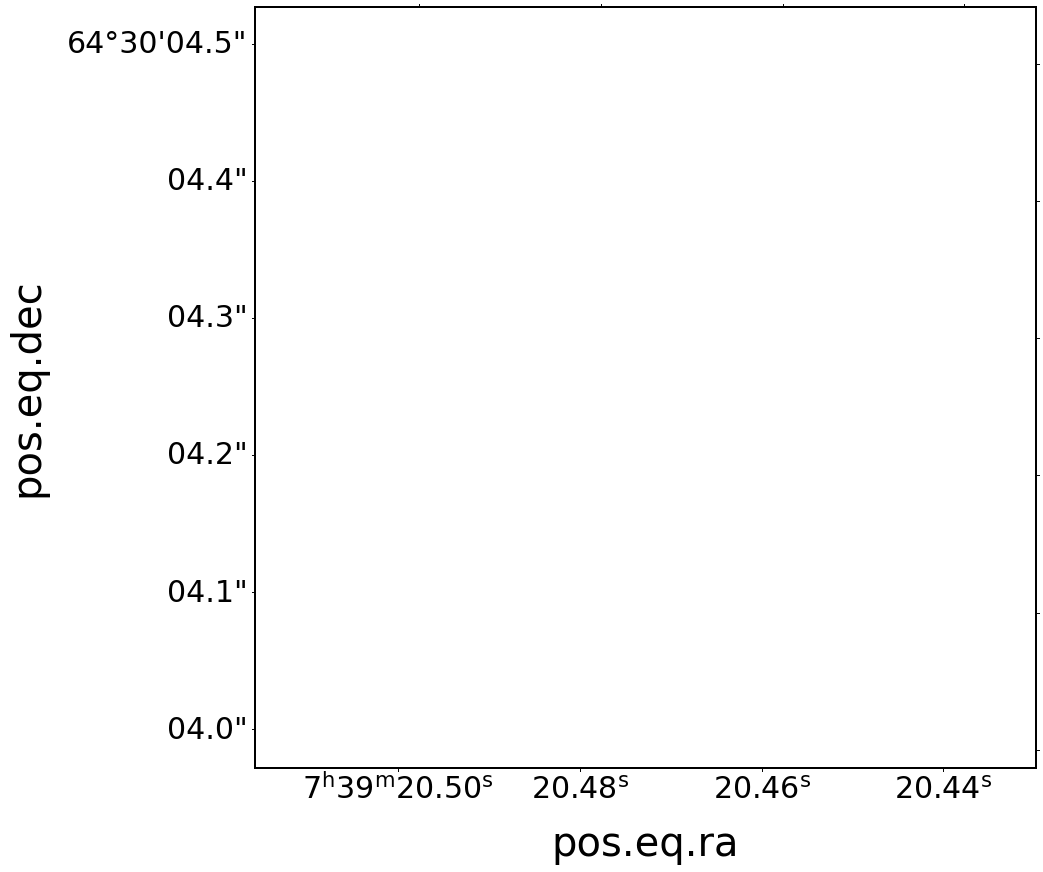

In [ ]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs2) #wcs for NGC4244, wcs1 for NGC4214, wcs2 for NGC2403
j = ax.scatter(RA2, DEC2,  marker='.', c=g_2403, cmap=plt.cm.jet, s=300, alpha=1,lw=3,
               facecolors='none', transform=ax.get_transform('world'), vmax=0.13,vmin=0) #
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 

title = 'NGC 2403'


plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='A($g$)',)

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()


ax.imshow(hdu2.data, cmap='gist_yarg', vmin=-9.4, vmax=24) #hdu for NGC4244, hdu for NGC4214, hdu for NGC2403

plt.tight_layout()
plt.show()

In [ ]:
print(RA2,DEC2, u_2403 , i_2403, z_2403, end='')

In [ ]:
print(max(u_4214))

In [ ]:
print(max(u_4244))

In [ ]:
table={"RA2":RA2,'DEC2':DEC2,'z_2403':z_2403,'i_2403':i_2403,'u_2403':u_2403}
import pandas as pd
pd.set_option('display.max_rows', None)
table = pd.DataFrame(table)

In [ ]:
table.to_csv

In [ ]:
def find_n_neighbours(ra_point, dec_point, base, n, neighbours_lim):
  base = base.to_pandas()
  data_ = {'ra':[], 'dec':[], 'ebv':[]}
  

  ra_up_lim = ra_point*(1 + neighbours_lim)
  ra_dw_lim =  ra_point*(1 - neighbours_lim)

  dec_up_lim = dec_point*(1 + neighbours_lim)
  dec_dw_lim = dec_point*(1 - neighbours_lim)
  
  base = base.loc[(base['ra'] > ra_dw_lim) & (base['ra'] < ra_up_lim)].copy()
  base = base.loc[(base['dec'] > dec_dw_lim) & (base['dec'] < dec_up_lim)].copy()


  base['distance'] = round(np.sqrt( ( base['ra'] - ra_point)**2 + ( base['dec'] - dec_point)**2), 4)


  base_final = base.sort_values('distance', ascending=True)


  return base_final.iloc[:n].copy()

In [ ]:
from astropy.table import vstack

In [ ]:
all_data = vstack([data, data1, data2])
all_data

In [ ]:

ra_ = 184.77488
dec_ = 36.69622
# 0.0165



In [ ]:
#for ra_, dec_ in zip(tabela_nova[['ra', 'dec']]):
  #list_ebvs = []

  #lista_ebvs.append(find_n_neighbours(ra_, dec_, all_data,  1, 0.2)['ebv'][0])


#tabela_nova['EVB'] = lista_ebvs




find_n_neighbours(ra_, dec_, all_data,  1, 0.2)



In [ ]:
all_data[['ra', 'dec']]

<ipython-input-4-90169b393b74>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs2)


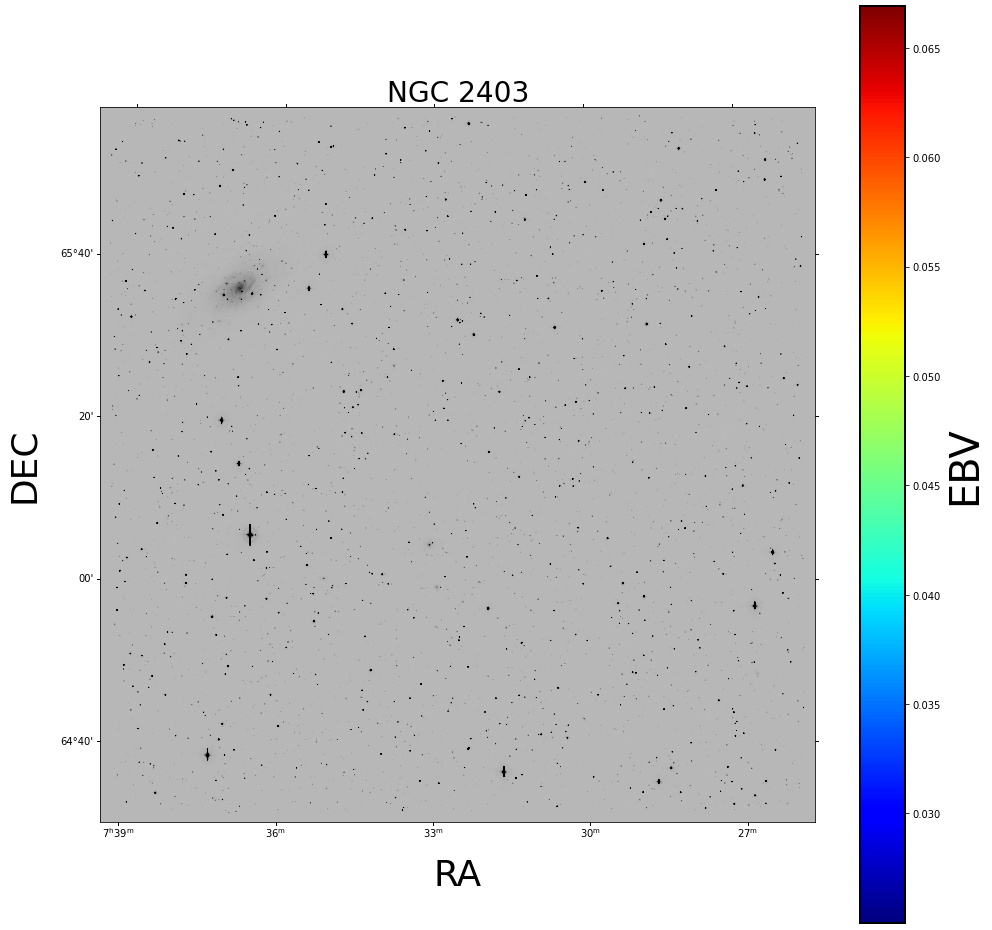

In [ ]:
#@title E(B-V) | NGC2403 - Point Sources

data = Table.read('SEXTRACTOR-GAIA-NGC2403-RAXDEC_EBV.fits')
RA = data['ra']
DEC = data['dec']
c = data['E_B_V_SandF']









#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs2)
j = ax.scatter(RA, DEC,  marker='.', c=c, cmap=plt.cm.jet, s=300, alpha=1,lw=3, facecolors='none', transform=ax.get_transform('world'))
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 
# set the color limits
#im.set_clim(0.8, 1.0)
title = 'NGC 2403'
#ax.legend()

plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='EBV',)

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()

#ax.imshow(hdu.data,cmap='gray', vmin=0.00002*np.mean(hdu.data), vmax=1*np.mean(hdu.data))
ax.imshow(hdu2.data, cmap='gist_yarg', vmin=-9.4, vmax=24) 
plt.tight_layout()
plt.show()

In [ ]:
print(c)

E_B_V_SandF
-----------
     0.0618
     0.0498
     0.0403
     0.0403
     0.0506
     0.0493
      0.039
      0.049
     0.0555
     0.0304
        ...
     0.0409
     0.0339
     0.0411
     0.0396
     0.0542
     0.0351
     0.0384
     0.0574
     0.0347
     0.0336
     0.0569
Length = 14603 rows


In [ ]:
r = 2.3829999*c
g = 3.398*c
i = 1.74300003*c
z = 1.28900003*c
u = 4.47900009*c
J0378 = 4.29400015*c
J0395 = 4.22599983*c
J0410 = 4.02299976*c
J0430 = 3.85899997*c
J0515 = 3.148*c
J0660 = 2.16100001*c
J0861 = 1.38100004*c

In [ ]:
dummy = np.column_stack((RA, DEC, r, g, i, z, u, J0378, J0395, J0410, J0430, J0515, J0660, J0861))
fmt = "%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f"
header = "RA, DEC, r, g, i, z, u, J0378, J0395, J0410, J0430, J0515, J0660, J0861"
np.savetxt('NGC_2403_reddening_bands', dummy, fmt=fmt, header=header, delimiter=',')


In [ ]:
data = Table.read('EBV2403ps.fits')
RA = data['RA']
DEC = data['DEC']
c = data['E_B_V_SandF']





#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)
ax = plt.subplot(projection=wcs2)
j = ax.scatter(RA, DEC,  marker='.', c=c, cmap=plt.cm.jet, s=300, alpha=1,lw=3, facecolors='none', transform=ax.get_transform('world'))
j.set_facecolor('none')


plt.rc('axes', labelsize=15) 
# set the color limits
#im.set_clim(0.8, 1.0)
title = 'NGC 2403'
#ax.legend()

plt.rc('axes', labelsize=40)
plt.rc('lines', lw=2.0,color='k')
plt.rc('axes',lw=2.0)
plt.rc('legend', fontsize=30)
fig.colorbar(j, ax=ax, label='EBV',)

plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
ax.set_xlabel('RA', size=36)
ax.set_ylabel('DEC', size=36)
plt.title(title, size=28)
plt.tight_layout()

#ax.imshow(hdu.data,cmap='gray', vmin=0.00002*np.mean(hdu.data), vmax=1*np.mean(hdu.data))
ax.imshow(hdu2.data, cmap='gist_yarg', vmin=-9.4, vmax=24) 
plt.tight_layout()
plt.show()